In [30]:
import pandas as pd

# nltk
import nltk
from nltk.tokenize import word_tokenize

In [118]:
# read in file
df = pd.read_csv('podcast_data.csv')

In [119]:
# check for nulls
df.isna().sum()

uuid                1
title               2
image          117971
description    117971
language       117977
categories     117977
website        117983
author         117983
itunes_id      117988
dtype: int64

In [120]:
# locate nulls
df.loc[df['description'].isna() == True]

,uuid,title,image,description,language,categories,website,author,itunes_id
49994,ade800168951427ebb1985e67328cfd9,Gary Shapiro’s,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66229,e36656092ffe4d1fa483eef6c0376443,MikeChase’s,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66230,e36656092ffe4d1fa483eef6c0376443,MikeChase’s,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66231,e36656092ffe4d1fa483eef6c0376443,MikeChase’s,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66232,e36656092ffe4d1fa483eef6c0376443,MikeChase’s,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
196606,35000521222c4cbbb20b6830db298786,Junction City First,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196607,35000521222c4cbbb20b6830db298786,Junction City First,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200319,6a779d45981e4fc795b7db731f969674,Grow in Grace,NaN,NaN,NaN,NaN,NaN,NaN,NaN
213783,&#xA;무게가 약간있는 돼지털 같은 방송으로,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [121]:
# drop nulls
df.dropna(inplace=True)

In [122]:
df.shape

(96100, 9)

In [123]:
# explore catergories 
df['categories'].nunique()

16023

In [124]:
# looking for categories with less than 2 observations
df['categories'].value_counts() < 2

Religion & Spirituality | Christianity                                                          False
Christianity | Religion & Spirituality                                                          False
Music                                                                                           False
Comedy                                                                                          False
Society & Culture                                                                               False
                                                                                                ...  
Educational Technology | Podcasting | Education | Technology | Software How-To                   True
Society & Culture | Education | Personal Journals | Health | Higher Education | Self-Help        True
Technology | Religion & Spirituality | Podcasting | Christianity                                 True
Non-Profit | Government & Organizations | Christianity | Religion & Spirituality |

In [125]:
# dropping categories with less than 2 observations, using index
cat_drop = df.groupby('categories').filter(lambda x : len(x)<100).index
# drop
df.drop(cat_drop, inplace=True)

In [126]:
# unique catergories left
df['categories'].nunique()

74

In [129]:
# value counts on remaining categories
df['categories'].value_counts(normalize=True)

Religion & Spirituality | Christianity    0.133354
Christianity | Religion & Spirituality    0.111179
Music                                     0.084152
Comedy                                    0.076913
Society & Culture                         0.067985
                                            ...   
Visual Arts | Arts                        0.001627
Religion & Spirituality | Judaism         0.001612
Natural Sciences | Science & Medicine     0.001597
Amateur | Sports & Recreation             0.001521
Society & Culture | Comedy                0.001521
Name: categories, Length: 74, dtype: float64

In [131]:
# tranisition to descriptions

In [132]:
# create a list of tokenized descriptions
description_list = []
for description in df['description']:
    try:
        description_list.append(word_tokenize(description))
    except:
        description_list.append('')
        print(description)

In [133]:
# create new column with tokenize lists
df['token_description'] = description_list

In [139]:
# use .apply to take words out of list
df['token_description'] = df['token_description'].apply(', '.join)

In [140]:
# output
df['token_description']

0         Listen, in, as, the, Practical, Ecommerce, edi...
1         On, the, show, we, ’, ll, be, talking, to, pas...
2         A, podcast, about, soundtracks, and, movies, f...
6         Living, Water, Dayton, 's, weekly, sermons, th...
14                                Podcast, by, Far, From.TV
                                ...                        
214082    Silly, banter, from, some, dumb, 20, odd, year...
214083    BAFTA, is, a, world-leading, independent, arts...
214084      Podcast, by, Justus, Ta'rique, &, R., Alexander
214085    JOY, 's, jazz, show, playing, everything, from...
214087    My, ultimate, goal, is, to, teach, you, how, t...
Name: token_description, Length: 65750, dtype: object

In [142]:
# use countvectorizor to create sparse matrix of words
# imports
from sklearn.feature_extraction.text import CountVectorizer

In [143]:
cvec = CountVectorizer()

In [144]:
description_cvec = cvec.fit_transform(df['token_description'])

<AxesSubplot:>

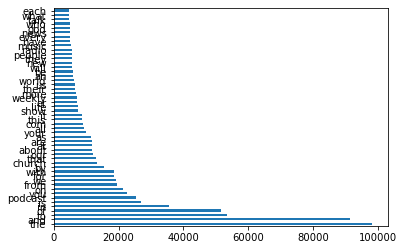

In [145]:
# create plot of common words
cvec_df = pd.DataFrame(description_cvec.todense(), columns=cvec.get_feature_names())
# return top 50 words
cvec_df.sum().sort_values(ascending=False).head(50).plot(kind='barh');